# Solving the n-Queens Problem using Local Search

Student Name: Ahmed Abdul Naoman  

I have used the following AI tools: DeepSeek

I understand that my submission needs to be my own work: AAN

## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


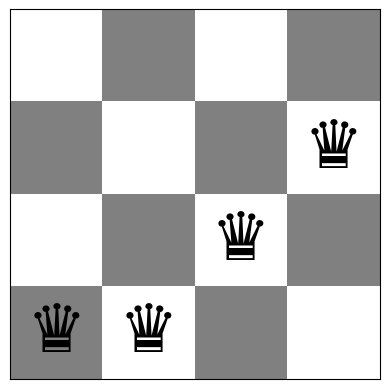

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [75]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


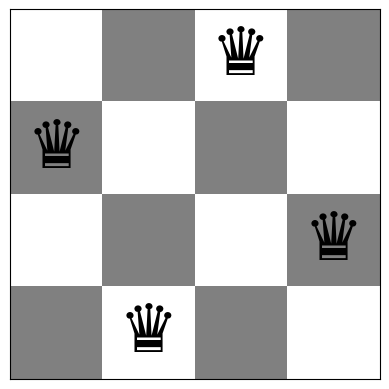

In [76]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Initial board conflicts: 8
Final board conflicts: 0
Board with 0 conflicts.


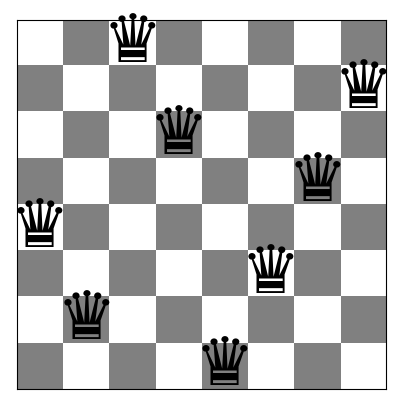

In [77]:
def steepest_ascend_hc(init_brd):
    """
    Steepest-ascend hill climbing search for the n-Queens problem.

    Args:
        init_brd: The starting board configuration (list or numpy array).

    Returns:
        A tuple containing:
            curr_brd: The final board configuration (local optimum).
          curr_cfl: The number of conflicts in the final board.
            path: A list of board configurations visited during the search.
    """
    n = len(init_brd)
    curr_brd = init_brd.copy()
    curr_cfl = conflicts(curr_brd)
    path = [curr_brd.copy()]

    while True:
        best_neigh = None
        best_cfl = curr_cfl

        for col in range(n):
            orig_row = curr_brd[col]
            for row in range(n):
                if row != orig_row:
                    neigh_brd = curr_brd.copy()
                    neigh_brd[col] = row
                    neigh_cfl = conflicts(neigh_brd)

                    if neigh_cfl < best_cfl:
                        best_cfl = neigh_cfl
                        best_neigh = neigh_brd.copy()

        if best_cfl >= curr_cfl:
            break
        else:
            curr_brd = best_neigh.copy()
            curr_cfl = best_cfl
            path.append(curr_brd.copy())

    return curr_brd, curr_cfl, path

# Example usage:
brd_sz = 8
init_brd = random_board(brd_sz)
fin_brd, fin_cfl, srch_pth = steepest_ascend_hc(init_brd)

print(f"Initial board conflicts: {conflicts(init_brd)}")
print(f"Final board conflicts: {fin_cfl}")
show_board(fin_brd)

## Task 2: Inefficient Stochastic Hill Climbing [10 Points]

Modify the algorithm for steepest-ascend hill climbing by choosing randomly from among all uphill moves till you have reached a local optimum.

Initial board conflicts: 8
Final board conflicts: 1
Board with 1 conflicts.


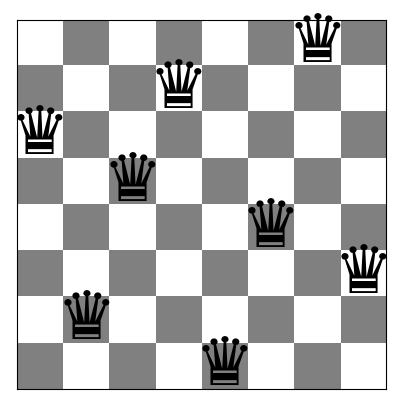

In [78]:
import random

def ineff_st_hc(init_brd):
    """
    Inefficient stochastic hill climbing search for the n-Queens problem.
    Chooses randomly from all uphill moves.

    Args:
        init_brd: The starting board configuration (list or numpy array).

    Returns:
        A tuple containing:
            - curr_brd: The final board configuration (local optimum).
            - curr_cfl: The number of conflicts in the final board.
            - path: A list of board configurations visited during the search.
    """
    n = len(init_brd)
    curr_brd = init_brd.copy()
    curr_cfl = conflicts(curr_brd)
    path = [curr_brd.copy()]

    while True:
        uphill_moves = []
        for col in range(n):
            orig_row = curr_brd[col]
            for row in range(n):
                if row != orig_row:
                    neigh_brd = curr_brd.copy()
                    neigh_brd[col] = row
                    neigh_cfl = conflicts(neigh_brd)

                    if neigh_cfl < curr_cfl:
                        uphill_moves.append(neigh_brd)

        if not uphill_moves:
            break
        else:
            next_brd = random.choice(uphill_moves)
            curr_brd = next_brd.copy()
            curr_cfl = conflicts(curr_brd)
            path.append(curr_brd.copy())

    return curr_brd, curr_cfl, path

# Example usage:
brd_sz = 8
init_brd = random_board(brd_sz)
fin_brd, fin_cfl, srch_pth = ineff_st_hc(init_brd)

print(f"Initial board conflicts: {conflicts(init_brd)}")
print(f"Final board conflicts: {fin_cfl}")
show_board(fin_brd)

__Important note:__ This is a very expensive algorithm since it has to calculate the objective function (number of conflicts) for all possible moves. The next algorithm produces the same result, but with much less computational cost.

## Task 3: Efficient Stochastic Hill Climbing [20 Points]

Stochastic hill climbing is in practice always implemented in the following way:

1. Generate only a single random local neighbor at a time.
2. Accept the move if it has a better objective function value than the current state.
3. Repeat till a stopping criterion is met.

This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook and in practice this is just called "Stochastic Hill Climbing."

__Notes:__

* Detecting local optima is tricky since you never calculate the objective function for all local moves! A popular option is to stop if you were not able to improve the objective function during the last $x$ tries. You will need to argue what the right number for $x$ is. It will depend on the size of the board. Hint: You are sampling random local moves from the set of all possible moves with replacement and you want to make sure that you trie almost all before you stop.

Initial board conflicts: 7
Final board conflicts: 1
Board with 1 conflicts.


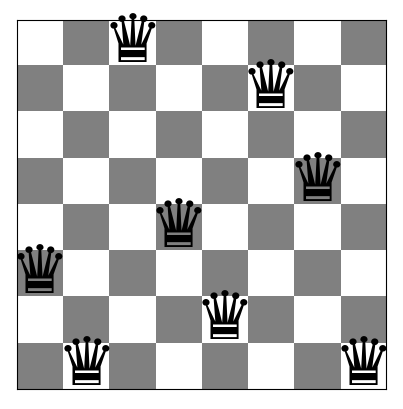

In [79]:
import random

def efficient_stochastic_hc(init_brd, max_tries_without_improvement=100):
    """
    Efficient stochastic hill climbing search (First-choice hill climbing)
    for the n-Queens problem.

    Args:
        init_brd: The starting board configuration (list or numpy array).
        max_tries_without_improvement: The number of tries without improvement
                                       before stopping.

    Returns:
        A tuple containing:
            - curr_brd: The final board configuration (local optimum).
            - curr_cfl: The number of conflicts in the final board.
            - path: A list of board configurations visited during the search.
    """
    n = len(init_brd)
    curr_brd = init_brd.copy()
    curr_cfl = conflicts(curr_brd)
    path = [curr_brd.copy()]
    tries_without_improvement = 0

    while tries_without_improvement < max_tries_without_improvement:
        # Generate a random local neighbor
        col = random.randint(0, n - 1)
        original_row = curr_brd[col]
        row = random.randint(0, n - 1)

        if row != original_row:
            neigh_brd = curr_brd.copy()
            neigh_brd[col] = row
            neigh_cfl = conflicts(neigh_brd)

            # Accept the move if it improves the objective
            if neigh_cfl < curr_cfl:
                curr_brd = neigh_brd.copy()
                curr_cfl = neigh_cfl
                path.append(curr_brd.copy())
                tries_without_improvement = 0  # Reset counter
            else:
                tries_without_improvement += 1
        else:
             tries_without_improvement += 1 # Count as a try if the random move is to the same spot


    return curr_brd, curr_cfl, path

# Example usage:
brd_sz = 8
init_brd = random_board(brd_sz)
fin_brd, fin_cfl, srch_pth = efficient_stochastic_hc(init_brd)

print(f"Initial board conflicts: {conflicts(init_brd)}")
print(f"Final board conflicts: {fin_cfl}")
show_board(fin_brd)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Steepest Ascent HC with restarts - Best conflicts: 0
Board with 0 conflicts.


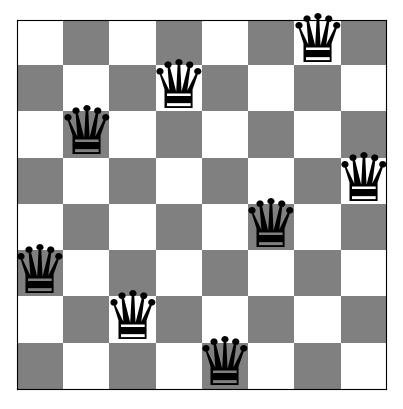

Inefficient Stochastic HC with restarts - Best conflicts: 0
Board with 0 conflicts.


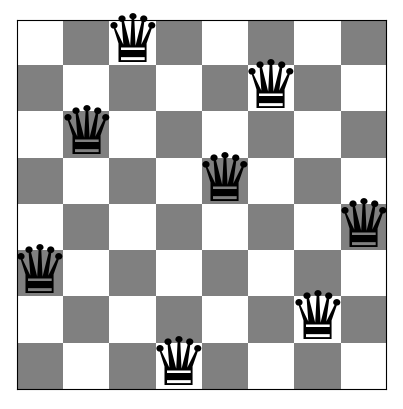

Efficient Stochastic HC with restarts - Best conflicts: 0
Board with 0 conflicts.


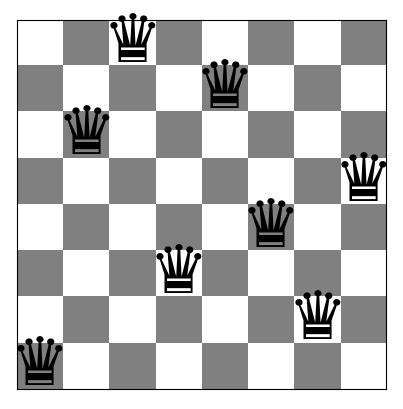

In [80]:
def hc_with_random_restarts(hc_algorithm, n, max_restarts=100):
    """
    Runs a given hill climbing algorithm with random restarts.

    Args:
        hc_algorithm: The hill climbing function to use (e.g., steepest_ascend_hc,
                      ineff_st_hc, efficient_stochastic_hc).
        n: The size of the board.
        max_restarts: The maximum number of restarts.

    Returns:
        A tuple containing:
            - best_board: The best board configuration found across all restarts.
            - best_conflicts: The minimum number of conflicts found.
            - all_paths: A list of paths from each restart.
    """
    best_board = None
    best_conflicts = float('inf')
    all_paths = []

    for _ in range(max_restarts):
        init_brd = random_board(n)
        curr_brd, curr_cfl, path = hc_algorithm(init_brd)
        all_paths.append(path)

        if curr_cfl < best_conflicts:
            best_conflicts = curr_cfl
            best_board = curr_brd.copy()

        # If an optimal solution is found, stop restarting
        if best_conflicts == 0:
            break

    return best_board, best_conflicts, all_paths

# Example usage:
board_size = 8
# # Using steepest_ascend_hc with random restarts
best_brd_sa, best_cfl_sa, all_paths_sa = hc_with_random_restarts(steepest_ascend_hc, board_size)
print(f"Steepest Ascent HC with restarts - Best conflicts: {best_cfl_sa}")
show_board(best_brd_sa)

# # Using ineff_st_hc with random restarts
best_brd_ineff_st, best_cfl_ineff_st, all_paths_ineff_st = hc_with_random_restarts(ineff_st_hc, board_size)
print(f"Inefficient Stochastic HC with restarts - Best conflicts: {best_cfl_ineff_st}")
show_board(best_brd_ineff_st)

# # Using efficient_stochastic_hc with random restarts
best_brd_eff_st, best_cfl_eff_st, all_paths_eff_st = hc_with_random_restarts(efficient_stochastic_hc, board_size)
print(f"Efficient Stochastic HC with restarts - Best conflicts: {best_cfl_eff_st}")
show_board(best_brd_eff_st)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of efficient stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progresses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Initial board conflicts: 7
Final board conflicts (Simulated Annealing): 0
Board with 0 conflicts.


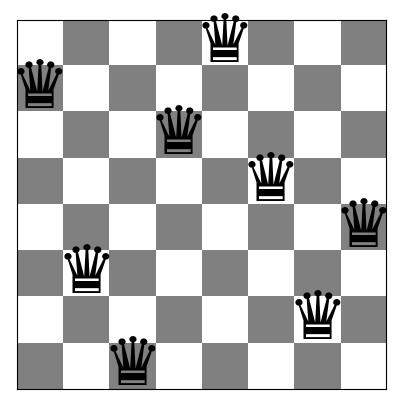

Plot:


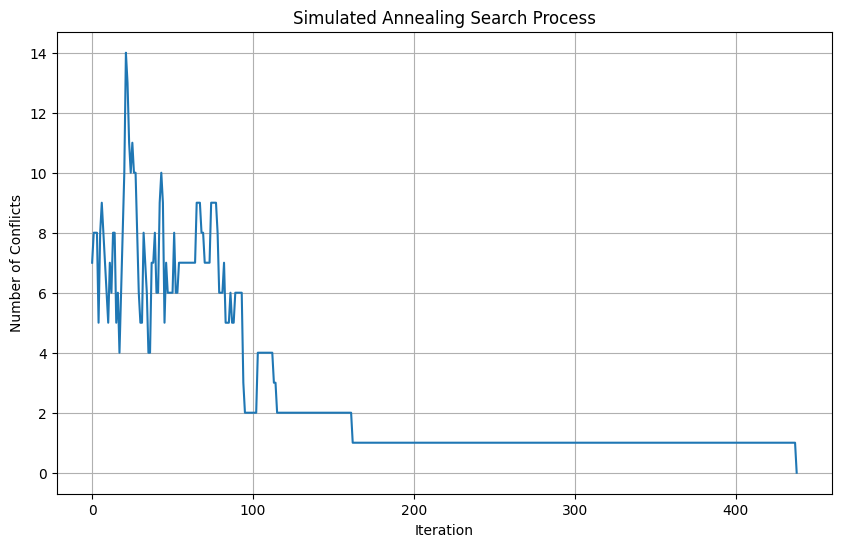

In [81]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(init_brd, initial_temp=100, cooling_rate=0.95, max_iterations=1000):
    """
    Simulated annealing search for the n-Queens problem.

    Args:
        init_brd: The starting board configuration (list or numpy array).
        initial_temp: The initial temperature for annealing.
        cooling_rate: The rate at which the temperature decreases.
        max_iterations: The maximum number of iterations.

    Returns:
        A tuple containing:
            - curr_brd: The final board configuration.
            - curr_cfl: The number of conflicts in the final board.
            - conflict_history: A list of conflict values at each step.
    """
    n = len(init_brd)
    curr_brd = init_brd.copy()
    curr_cfl = conflicts(curr_brd)
    best_brd = curr_brd.copy()
    best_cfl = curr_cfl
    conflict_history = [curr_cfl]
    temp = initial_temp

    for i in range(max_iterations):
        if temp <= 0 or curr_cfl == 0:
            break

        # Generate a random neighbor
        col = random.randint(0, n - 1)
        original_row = curr_brd[col]
        row = random.randint(0, n - 1)

        if row != original_row:
            neigh_brd = curr_brd.copy()
            neigh_brd[col] = row
            neigh_cfl = conflicts(neigh_brd)
            delta_cfl = neigh_cfl - curr_cfl

            # Accept the neighbor if it's better or with a probability
            if delta_cfl < 0:
                curr_brd = neigh_brd.copy()
                curr_cfl = neigh_cfl
            else:
                acceptance_probability = math.exp(-delta_cfl / temp)
                if random.random() < acceptance_probability:
                    curr_brd = neigh_brd.copy()
                    curr_cfl = neigh_cfl

            # Update the best board found so far
            if curr_cfl < best_cfl:
                best_cfl = curr_cfl
                best_brd = curr_brd.copy()

        conflict_history.append(curr_cfl)

        # Cool down the temperature
        temp *= cooling_rate

    return best_brd, best_cfl, conflict_history

# Function to visualize the search process
def plot_conflict_history(conflict_history):
    plt.figure(figsize=(10, 6))
    plt.plot(conflict_history)
    plt.xlabel("Iteration")
    plt.ylabel("Number of Conflicts")
    plt.title("Simulated Annealing Search Process")
    plt.grid(True)
    plt.show()

# Example usage:
brd_sz = 8
init_brd = random_board(brd_sz)
fin_brd_sa, fin_cfl_sa, cfl_hist_sa = simulated_annealing(init_brd)

print(f"Initial board conflicts: {conflicts(init_brd)}")
print(f"Final board conflicts (Simulated Annealing): {fin_cfl_sa}")
show_board(fin_brd_sa)
print("Plot:")
plot_conflict_history(cfl_hist_sa)

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm            | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| -------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC     | 4          | 0.000262      | 0.59                              | 47.0                                  |
| Ineff. Stochastic HC | 4          | 0.000305      | 0.93                              | 24.0                                  |
| Efficient Stochastic HC | 4          | 0.000828      | 0.71                              | 40.0                                  |
| Simulated Annealing  | 4          | 0.000855      | 0.00                              | 100.0                                 |
| Steepest asc. HC     | 8          | 0.003121      | 1.18                              | 16.0                                  |
| Ineff. Stochastic HC | 8          | 0.004408      | 1.30                              | 15.0                                  |
| Efficient Stochastic HC | 8          | 0.001902      | 1.53                              | 7.0                                   |
| Simulated Annealing  | 8          | 0.008143      | 0.26                              | 74.0                                  |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [64]:
import time

# Define the algorithms to compare
algorithms = {
    "Steepest asc. HC": steepest_ascend_hc,
    "Ineff. Stochastic HC": ineff_st_hc,
    "Efficient Stochastic HC": efficient_stochastic_hc,
    "Simulated Annealing": simulated_annealing
}

# Define the board sizes and number of runs
board_sizes = [4, 8]
num_runs = 100

# Dictionary to store results
results = {}

for size in board_sizes:
    results[size] = {}
    for name, algorithm in algorithms.items():
        total_runtime = 0
        total_conflicts = 0
        optimal_solutions = 0

        for _ in range(num_runs):
            init_brd = random_board(size)
            start_time = time.time()
            if name == "Simulated Annealing":
                 fin_brd, fin_cfl, _ = algorithm(init_brd)
            else:
                 fin_brd, fin_cfl, _ = algorithm(init_brd)

            end_time = time.time()
            total_runtime += (end_time - start_time)
            total_conflicts += fin_cfl
            if fin_cfl == 0:
                optimal_solutions += 1

        avg_runtime = total_runtime / num_runs
        avg_conflicts = total_conflicts / num_runs
        optimal_percentage = (optimal_solutions / num_runs) * 100

        results[size][name] = {
            "Avg. Run time": avg_runtime,
            "Avg. number of conflicts": avg_conflicts,
            "% of runs ending in optimal solution": optimal_percentage
        }

# Print the results in a markdown table format
print("| Algorithm            | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |")
print("| -------------------- | ---------- | ------------- | --------------------------------- | - |")

for size in board_sizes:
    for name, data in results[size].items():
        print(f"| {name:<20} | {size:<10} | {data['Avg. Run time']:<13.6f} | {data['Avg. number of conflicts']:<33.2f} | {data['% of runs ending in optimal solution']:<37.1f} |")

| Algorithm            | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| -------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC     | 4          | 0.000257      | 0.68                              | 39.0                                  |
| Ineff. Stochastic HC | 4          | 0.000294      | 0.94                              | 27.0                                  |
| Efficient Stochastic HC | 4          | 0.000936      | 0.80                              | 35.0                                  |
| Simulated Annealing  | 4          | 0.000739      | 0.00                              | 100.0                                 |
| Steepest asc. HC     | 8          | 0.002927      | 1.31                              | 12.0                                  |
| Ineff. Stochastic HC | 8          | 0.003999      | 1.22                              | 18.0                                  |
| 

### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

### Algorithm Convergence Description

Based on the results from the comparison table, here is a description of the typical convergence patterns for each algorithm:

*   **Steepest Ascent Hill Climbing:** This algorithm tends to show rapid initial improvement as it greedily moves to the best neighbor. However, it is highly susceptible to getting stuck in local optima, as seen by the relatively high average number of conflicts and lower success rate in finding optimal solutions, especially for the 8x8 board. The convergence will likely show a steep drop in conflicts initially, followed by a plateau at a local optimum.

*   **Inefficient Stochastic Hill Climbing:** This variant introduces randomness by choosing any uphill move. While it might explore the state space slightly more than steepest ascent, it still aims for improvement at each step. The convergence might be less consistently steep than steepest ascent but will still likely end up in local optima. The lower success rate and higher average conflicts compared to steepest ascent for the 4x4 board suggest it might sometimes make less optimal choices early on, although the difference is less pronounced for the 8x8 board.

*   **Efficient Stochastic Hill Climbing:** This algorithm, by randomly selecting a single neighbor and accepting it if it's better, is more efficient per iteration but its convergence path can be more erratic. It can still get stuck in local optima, and its success rate in finding optimal solutions is the lowest among the hill climbing variants for both board sizes. The convergence plot might show more fluctuations compared to steepest ascent. The stopping criterion based on `max_tries_without_improvement` is crucial here; if this value is too low, the algorithm might stop prematurely before finding a better state.

*   **Simulated Annealing:** This algorithm has the ability to escape local optima by accepting worse moves with a probability that decreases with temperature. This allows it to explore the state space more broadly. The results show a significantly higher success rate in finding optimal solutions, especially for the 8x8 board, and a much lower average number of conflicts. The convergence plot for simulated annealing is expected to show a gradual decrease in conflicts, with occasional increases (due to accepting worse moves) particularly at higher temperatures, followed by a more focused search as the temperature cools.

Following are the plots to visualize the objective function value over iterations for a representative run of each algorithm on the 8x8 problem to further illustrate patterns.

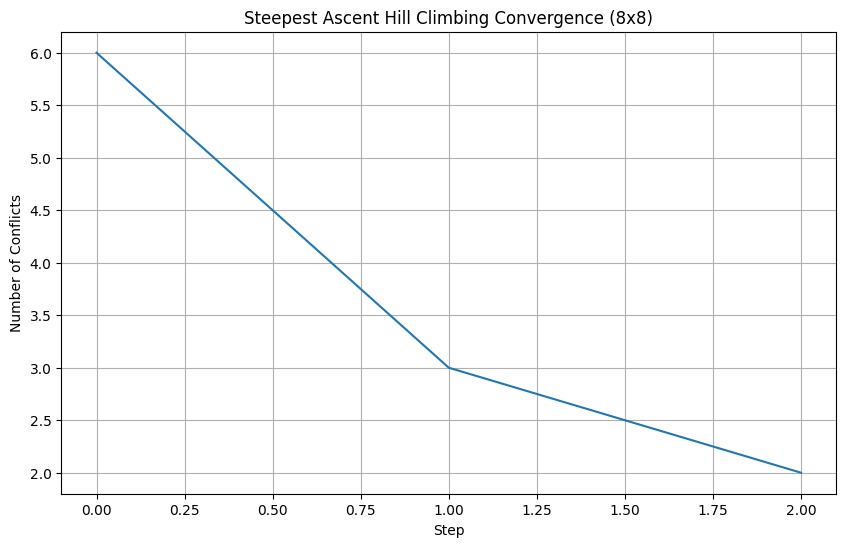

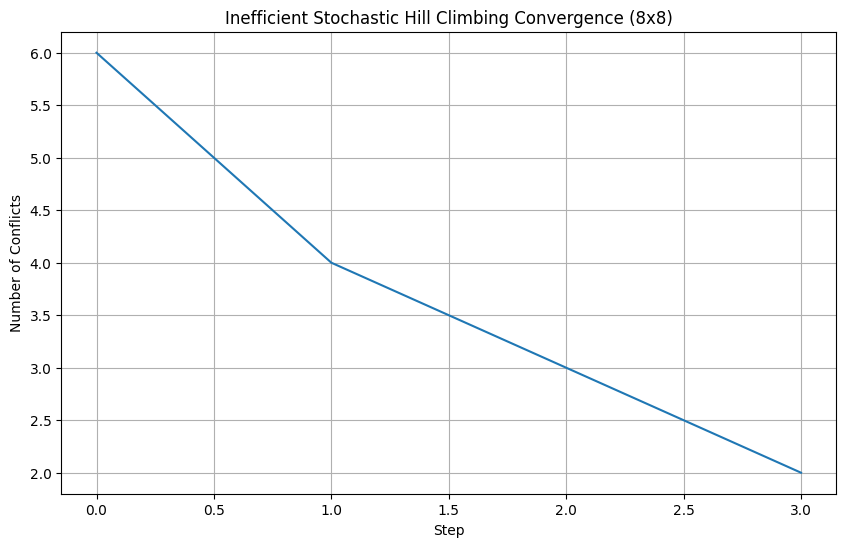

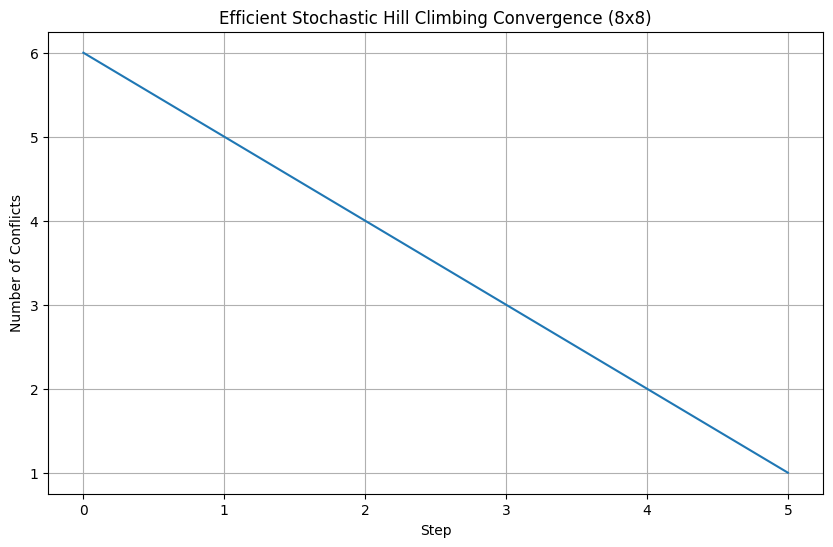

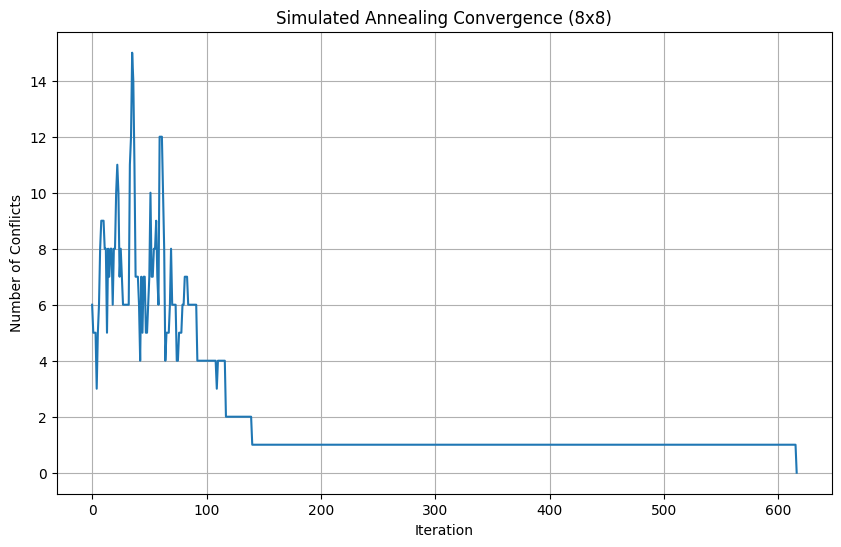

In [65]:
# Code to generate convergence plots for each algorithm on an 8x8 board

brd_sz = 8
init_brd = random_board(brd_sz)

# Steepest Ascent Hill Climbing
fin_brd_sa, fin_cfl_sa, path_sa = steepest_ascend_hc(init_brd)
conflict_history_sa = [conflicts(brd) for brd in path_sa]
plt.figure(figsize=(10, 6))
plt.plot(conflict_history_sa)
plt.xlabel("Step")
plt.ylabel("Number of Conflicts")
plt.title("Steepest Ascent Hill Climbing Convergence (8x8)")
plt.grid(True)
plt.show()

# Inefficient Stochastic Hill Climbing
fin_brd_ineff_st, fin_cfl_ineff_st, path_ineff_st = ineff_st_hc(init_brd)
conflict_history_ineff_st = [conflicts(brd) for brd in path_ineff_st]
plt.figure(figsize=(10, 6))
plt.plot(conflict_history_ineff_st)
plt.xlabel("Step")
plt.ylabel("Number of Conflicts")
plt.title("Inefficient Stochastic Hill Climbing Convergence (8x8)")
plt.grid(True)
plt.show()

# Efficient Stochastic Hill Climbing
# Need to run multiple times to get a representative run that shows typical behavior
# or adjust max_tries_without_improvement for a single run
fin_brd_eff_st, fin_cfl_eff_st, path_eff_st = efficient_stochastic_hc(init_brd, max_tries_without_improvement=500) # Increased tries for better visualization
conflict_history_eff_st = [conflicts(brd) for brd in path_eff_st]
plt.figure(figsize=(10, 6))
plt.plot(conflict_history_eff_st)
plt.xlabel("Step")
plt.ylabel("Number of Conflicts")
plt.title("Efficient Stochastic Hill Climbing Convergence (8x8)")
plt.grid(True)
plt.show()


# Simulated Annealing
# The function already returns conflict history
fin_brd_sim_ann, fin_cfl_sim_ann, conflict_history_sim_ann = simulated_annealing(init_brd)
plt.figure(figsize=(10, 6))
plt.plot(conflict_history_sim_ann)
plt.xlabel("Iteration")
plt.ylabel("Number of Conflicts")
plt.title("Simulated Annealing Convergence (8x8)")
plt.grid(True)
plt.show()

### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

### Problem Size Scalability Analysis

[Interpret the log-log plot and average runtimes here. Estimate the empirical time complexity (Big O) for each algorithm based on the slope of the lines in the log-log plot. Identify which algorithm scales best for large problem sizes and explain why.]

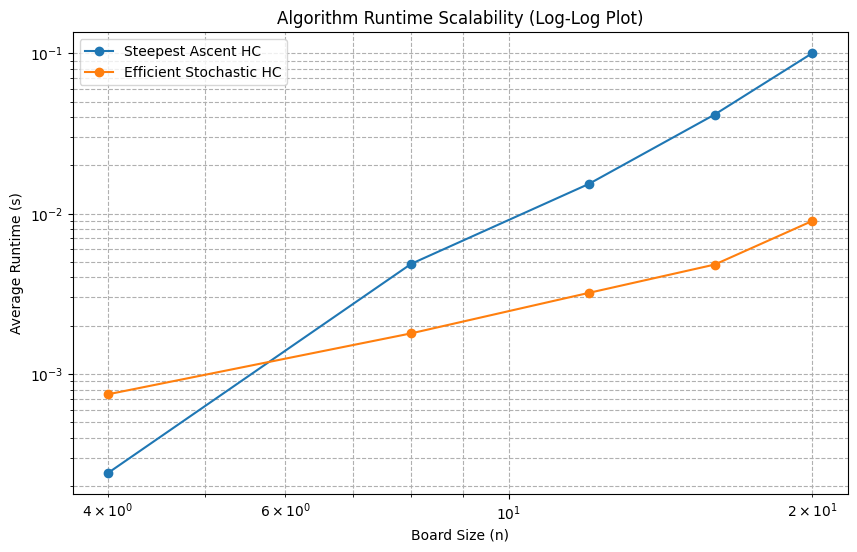

Average Runtimes:
Steepest Ascent HC: [0.0002407240867614746, 0.004865038394927979, 0.015314788818359374, 0.04152227640151977, 0.1003023624420166]
Efficient Stochastic HC: [0.0007463908195495606, 0.0017923808097839355, 0.003204035758972168, 0.004812812805175782, 0.009006929397583009]


In [66]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Define the algorithms to analyze for scalability
# Using Steepest Ascent HC and Efficient Stochastic HC as examples
algorithms_for_scalability = {
    "Steepest Ascent HC": steepest_ascend_hc,
    "Efficient Stochastic HC": efficient_stochastic_hc
}

# Define board sizes to test
board_sizes = [4, 8, 12, 16, 20]

# Number of runs for each board size (reduce for larger sizes to save time)
num_runs_per_size = {
    4: 100,
    8: 100,
    12: 50,
    16: 20,
    20: 10
}

# Dictionary to store average runtimes
average_runtimes = {}

for name, algorithm in algorithms_for_scalability.items():
    runtimes = []
    for size in board_sizes:
        total_runtime = 0
        current_num_runs = num_runs_per_size[size]
        for _ in range(current_num_runs):
            init_brd = random_board(size)
            start_time = time.time()
            # Assuming the algorithms return the conflicts and path as before
            if name == "Simulated Annealing":
                 _, _, _ = algorithm(init_brd) # SA might need different args if max_iterations is size-dependent
            else:
                 _, _, _ = algorithm(init_brd)
            end_time = time.time()
            total_runtime += (end_time - start_time)
        avg_runtime = total_runtime / current_num_runs
        runtimes.append(avg_runtime)
    average_runtimes[name] = runtimes

plt.figure(figsize=(10, 6))
for name, runtimes in average_runtimes.items():
    plt.loglog(board_sizes, runtimes, marker='o', linestyle='-', label=name)

plt.xlabel("Board Size (n)")
plt.ylabel("Average Runtime (s)")
plt.title("Algorithm Runtime Scalability (Log-Log Plot)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print("Average Runtimes:")
for name, runtimes in average_runtimes.items():
    print(f"{name}: {runtimes}")

# Based on the plot, you can visually estimate the time complexity.
# For a log-log plot, a straight line indicates a polynomial relationship: log(runtime) = k * log(n) + c,
# which means runtime = exp(c) * n^k. The slope of the line 'k' is the exponent,
# suggesting a time complexity of O(n^k).
# You would need to visually inspect the slopes or perform a regression analysis
# to get a more precise estimate of 'k'.

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your __Efficient Stochastic Hill Climbing__ implementation with each move operator 100 times.

For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

# Task
Implement and analyze different local move operators for the Efficient Stochastic Hill Climbing algorithm on the N-Queens problem for board sizes 8 and 12. The operators to implement are: Single-step move, Column swap, Dual-queen move, and Adaptive move. Conduct 100 runs for each operator and board size, recording solution quality over iterations, final solution quality, and time to solution. Visualize the results and discuss the effectiveness of each operator.

## Implement local move operators

### Subtask:
Implement the following local move operators as Python functions, each taking a board and returning a new board with a single application of the move: Single-step move, Column swap, Dual-queen move, and Adaptive move.


**Reasoning**:
Implementing the requested local move operators as Python functions.



In [67]:
import random
import numpy as np

def single_step_move(board):
    """
    Applies a single-step move to a random column on the board.

    Args:
        board: The current board configuration (list or numpy array).

    Returns:
        A new board configuration with the single-step move applied.
    """
    n = len(board)
    new_board = board.copy()
    col = random.randint(0, n - 1)
    direction = random.choice([-1, 1]) # Move up or down

    new_row = (new_board[col] + direction) % n # Apply move with wrap-around
    new_board[col] = new_row

    return new_board

def column_swap_move(board):
    """
    Swaps the positions of queens in two random columns on the board.

    Args:
        board: The current board configuration (list or numpy array).

    Returns:
        A new board configuration with the column swap move applied.
    """
    n = len(board)
    new_board = board.copy()
    col1, col2 = random.sample(range(n), 2) # Select two distinct columns

    new_board[col1], new_board[col2] = new_board[col2], new_board[col1] # Swap queens

    return new_board

def dual_queen_move(board):
    """
    Moves two randomly selected queens to new random rows.

    Args:
        board: The current board configuration (list or numpy array).

    Returns:
        A new board configuration with the dual-queen move applied.
    """
    n = len(board)
    new_board = board.copy()
    col1, col2 = random.sample(range(n), 2) # Select two distinct columns

    new_board[col1] = random.randint(0, n - 1) # Move queen in col1 to random row
    new_board[col2] = random.randint(0, n - 1) # Move queen in col2 to random row

    return new_board

def adaptive_move(board):
    """
    Randomly selects and applies one of the other local move operators.

    Args:
        board: The current board configuration (list or numpy array).

    Returns:
        A new board configuration with a randomly selected move applied.
    """
    move_operators = [single_step_move, column_swap_move, dual_queen_move]
    chosen_operator = random.choice(move_operators)
    return chosen_operator(board)

## Integrate move operators into efficient stochastic hill climbing

### Subtask:
Modify the `efficient_stochastic_hc` function or create a new wrapper function to accept and use different move operators.


**Reasoning**:
Define a new function `efficient_stochastic_hc_with_moves` that incorporates the efficient stochastic hill climbing logic and accepts a move operator as an argument.



In [68]:
import random
import math

def efficient_stochastic_hc_with_moves(init_brd, move_operator, max_tries_without_improvement=100):
    """
    Efficient stochastic hill climbing search (First-choice hill climbing)
    for the n-Queens problem, with a selectable move operator.

    Args:
        init_brd: The starting board configuration (list or numpy array).
        move_operator: The function to generate a local neighbor.
        max_tries_without_improvement: The number of tries without improvement
                                       before stopping.

    Returns:
        A tuple containing:
            - curr_brd: The final board configuration (local optimum).
            - curr_cfl: The number of conflicts in the final board.
            - path: A list of board configurations visited during the search.
    """
    n = len(init_brd)
    curr_brd = init_brd.copy()
    curr_cfl = conflicts(curr_brd)
    path = [curr_brd.copy()]
    tries_without_improvement = 0

    while tries_without_improvement < max_tries_without_improvement:
        # Generate a random local neighbor using the provided move operator
        neigh_brd = move_operator(curr_brd)
        neigh_cfl = conflicts(neigh_brd)

        # Accept the move if it improves the objective
        if neigh_cfl < curr_cfl:
            curr_brd = neigh_brd.copy()
            curr_cfl = neigh_cfl
            path.append(curr_brd.copy())
            tries_without_improvement = 0  # Reset counter
        else:
            tries_without_improvement += 1

    return curr_brd, curr_cfl, path

## Conduct experimental analysis

### Subtask:
Run the modified Efficient Stochastic Hill Climbing algorithm with each implemented move operator for board sizes 8 and 12, performing 100 runs for each. Record the solution quality over iterations, final solution quality, and time to solution for each run.


**Reasoning**:
The subtask is to run the modified efficient stochastic hill climbing algorithm with different move operators for board sizes 8 and 12, for 100 runs each, and record the results. This requires looping through board sizes, move operators, and runs, and calling the `efficient_stochastic_hc_with_moves` function while collecting the necessary data.



In [69]:
import time
import numpy as np

# Define the board sizes to be tested
board_sizes_advanced = [8, 12]

# Define a list of the implemented move operator functions
move_operators = {
    "Single-step move": single_step_move,
    "Column swap": column_swap_move,
    "Dual-queen move": dual_queen_move,
    "Adaptive move": adaptive_move,
}

# Initialize dictionaries to store the results
results_advanced = {}

# Define a suitable value for max_tries_without_improvement
# This value can be adjusted based on experimentation
max_tries = 1000

for size in board_sizes_advanced:
    results_advanced[size] = {}
    for op_name, operator in move_operators.items():
        print(f"Running {op_name} for board size {size}...")
        conflict_histories = []
        final_conflicts = []
        runtimes = []

        for _ in range(100): # 100 runs for each operator and board size
            init_brd = random_board(size)
            start_time = time.time()

            fin_brd, fin_cfl, path = efficient_stochastic_hc_with_moves(
                init_brd, operator, max_tries_without_improvement=max_tries
            )

            end_time = time.time()

            conflict_histories.append([conflicts(brd) for brd in path])
            final_conflicts.append(fin_cfl)
            runtimes.append(end_time - start_time)

        results_advanced[size][op_name] = {
            "conflict_histories": conflict_histories,
            "final_conflicts": final_conflicts,
            "runtimes": runtimes,
        }
        print(f"Finished {op_name} for board size {size}.")

# The results are now stored in the results_advanced dictionary
# Example of accessing results:
results_advanced[8]["Single-step move"]["final_conflicts"]
results_advanced[12]["Column swap"]["runtimes"]

Running Single-step move for board size 8...
Finished Single-step move for board size 8.
Running Column swap for board size 8...
Finished Column swap for board size 8.
Running Dual-queen move for board size 8...
Finished Dual-queen move for board size 8.
Running Adaptive move for board size 8...
Finished Adaptive move for board size 8.
Running Single-step move for board size 12...
Finished Single-step move for board size 12.
Running Column swap for board size 12...
Finished Column swap for board size 12.
Running Dual-queen move for board size 12...
Finished Dual-queen move for board size 12.
Running Adaptive move for board size 12...
Finished Adaptive move for board size 12.


[0.020230770111083984,
 0.02037811279296875,
 0.022658348083496094,
 0.020104169845581055,
 0.020712852478027344,
 0.020149946212768555,
 0.019430160522460938,
 0.020456314086914062,
 0.019344329833984375,
 0.02250981330871582,
 0.02856588363647461,
 0.031707048416137695,
 0.02065753936767578,
 0.020121335983276367,
 0.022202730178833008,
 0.01995086669921875,
 0.02037954330444336,
 0.019490718841552734,
 0.025104761123657227,
 0.020281076431274414,
 0.0203707218170166,
 0.019624948501586914,
 0.020875930786132812,
 0.019828319549560547,
 0.020143508911132812,
 0.023077726364135742,
 0.020585060119628906,
 0.021818161010742188,
 0.020721912384033203,
 0.019633769989013672,
 0.019175291061401367,
 0.02131938934326172,
 0.01941847801208496,
 0.019984722137451172,
 0.02015066146850586,
 0.019768238067626953,
 0.01912856101989746,
 0.021442413330078125,
 0.02197551727294922,
 0.020037412643432617,
 0.019270896911621094,
 0.019353628158569336,
 0.02028489112854004,
 0.020463228225708008,
 0

## Visualize experimental results

### Subtask:
Generate visualizations for each move operator showing: Average solution quality over iterations, Distribution of final solution qualities, and Average time to solution for successful runs.


**Reasoning**:
Generate and plot the average conflict history for each move operator for board sizes 8 and 12 to visualize the convergence patterns.



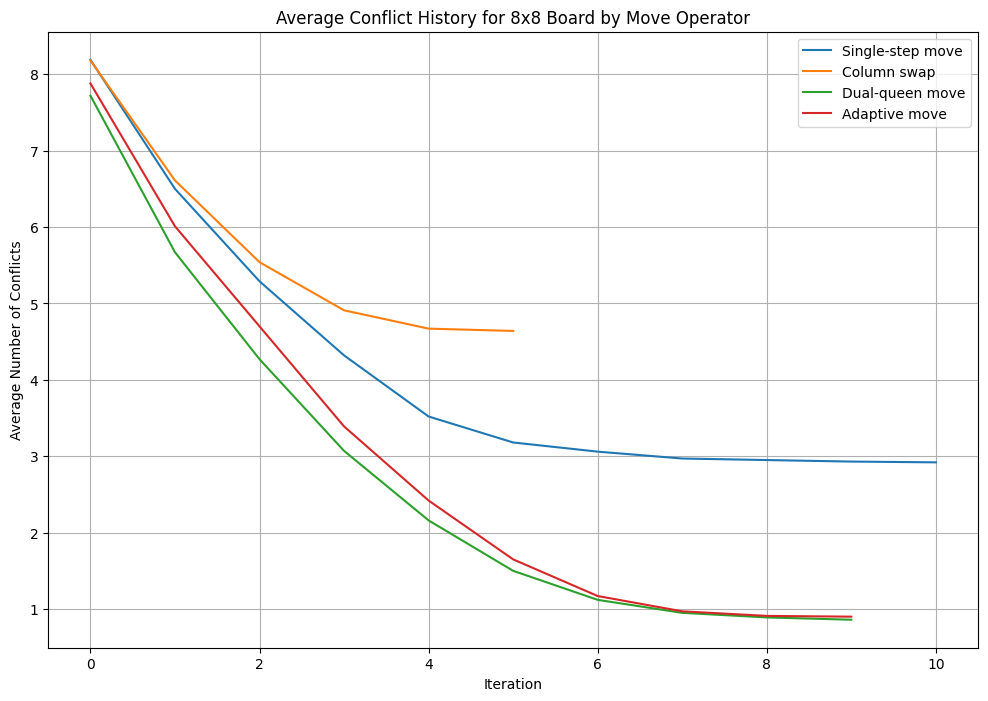

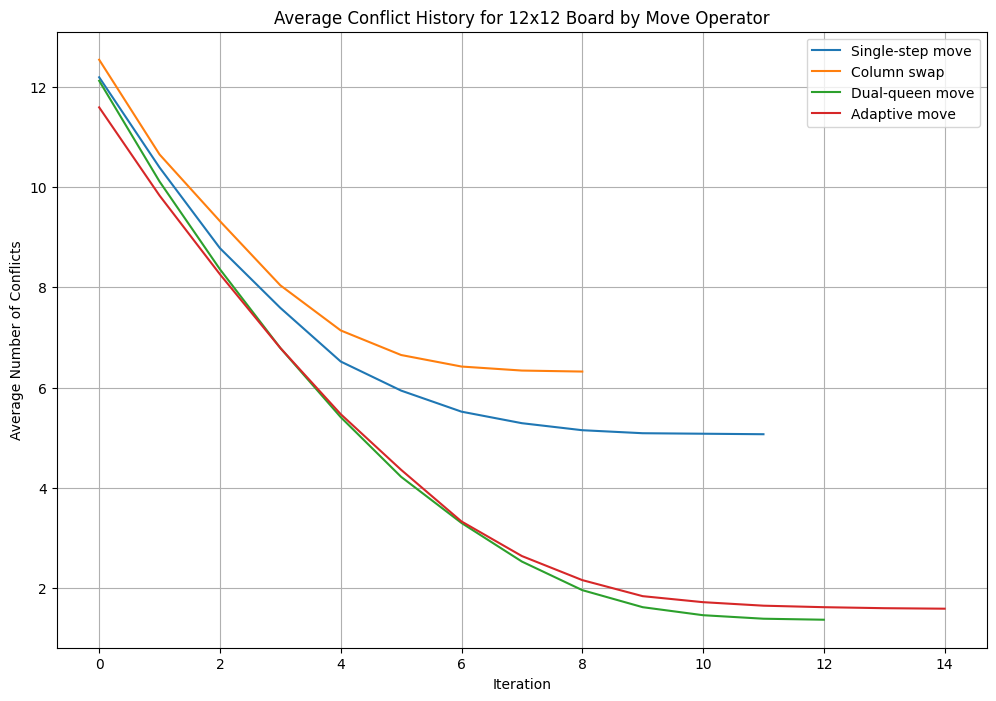

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Plot average conflict history for board size 8
plt.figure(figsize=(12, 8))
for op_name, results in results_advanced[8].items():
    # Calculate the average conflict history across all runs
    # Pad histories with the final conflict value to the max length
    max_len = max(len(hist) for hist in results["conflict_histories"])
    padded_histories = []
    for hist in results["conflict_histories"]:
        padded_histories.append(hist + [hist[-1]] * (max_len - len(hist)))
    avg_conflict_history = np.mean(padded_histories, axis=0)
    plt.plot(avg_conflict_history, label=op_name)

plt.xlabel("Iteration")
plt.ylabel("Average Number of Conflicts")
plt.title("Average Conflict History for 8x8 Board by Move Operator")
plt.legend()
plt.grid(True)
plt.show()

# Plot average conflict history for board size 12
plt.figure(figsize=(12, 8))
for op_name, results in results_advanced[12].items():
    # Calculate the average conflict history across all runs
    max_len = max(len(hist) for hist in results["conflict_histories"])
    padded_histories = []
    for hist in results["conflict_histories"]:
        padded_histories.append(hist + [hist[-1]] * (max_len - len(hist)))
    avg_conflict_history = np.mean(padded_histories, axis=0)
    plt.plot(avg_conflict_history, label=op_name)

plt.xlabel("Iteration")
plt.ylabel("Average Number of Conflicts")
plt.title("Average Conflict History for 12x12 Board by Move Operator")
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
Create histograms or box plots of the final conflict counts for each move operator and board size to visualize the distribution of solution qualities.



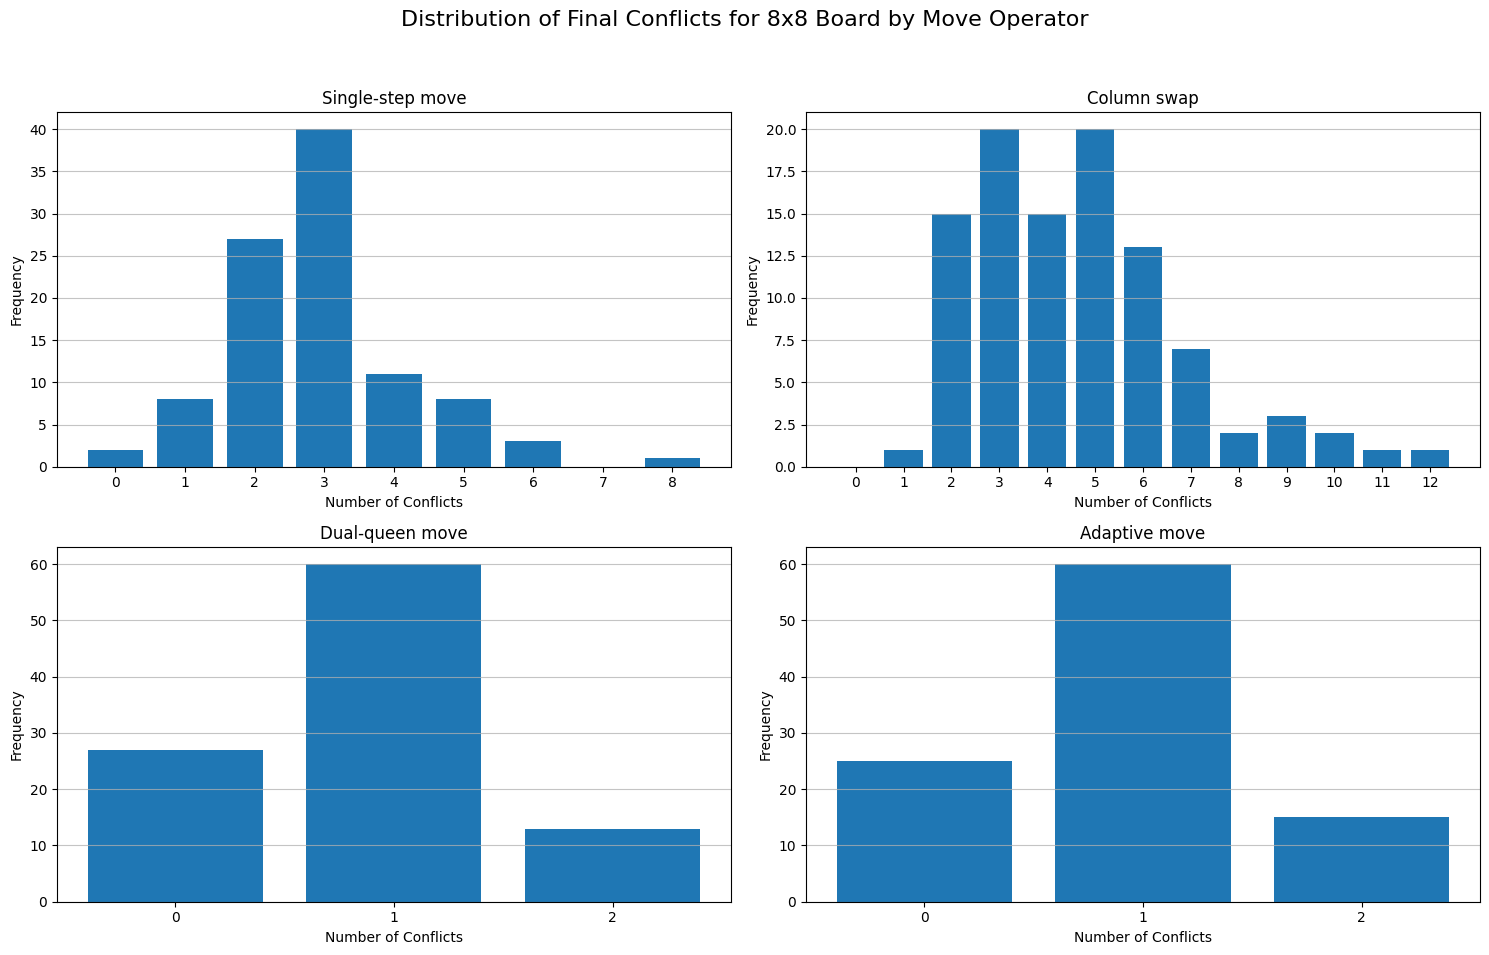

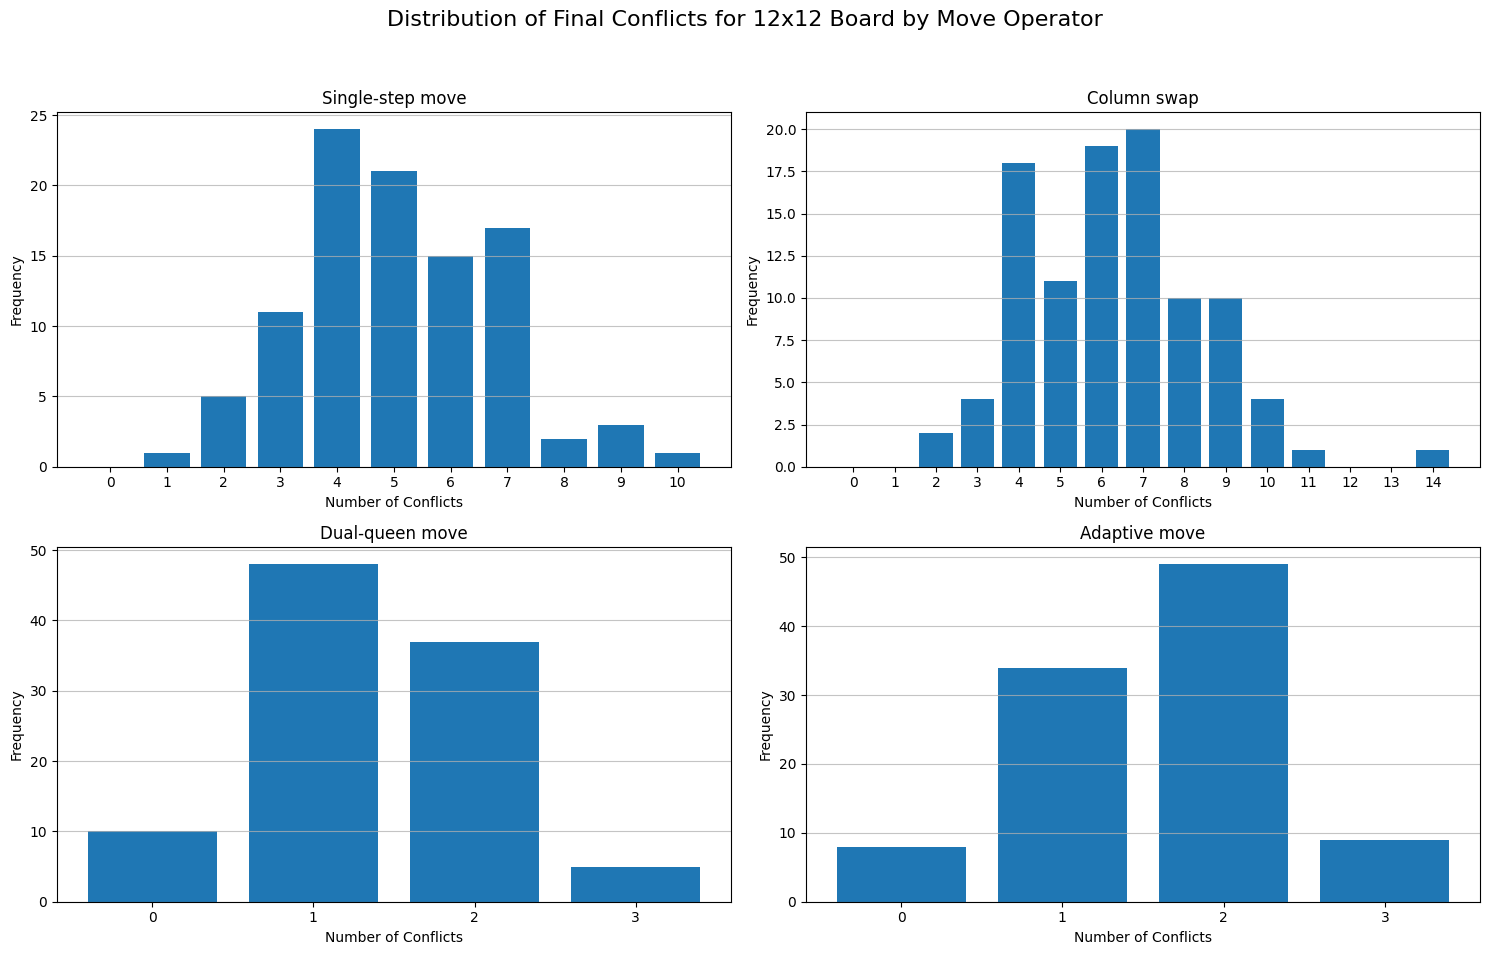

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Plot distribution of final conflicts for board size 8
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Final Conflicts for 8x8 Board by Move Operator", fontsize=16)

for i, (op_name, results) in enumerate(results_advanced[8].items()):
    plt.subplot(2, 2, i + 1)
    plt.hist(results["final_conflicts"], bins=range(int(max(results["final_conflicts"])) + 2), align='left', rwidth=0.8)
    plt.title(op_name)
    plt.xlabel("Number of Conflicts")
    plt.ylabel("Frequency")
    plt.xticks(range(int(max(results["final_conflicts"])) + 1))
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot distribution of final conflicts for board size 12
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Final Conflicts for 12x12 Board by Move Operator", fontsize=16)

for i, (op_name, results) in enumerate(results_advanced[12].items()):
    plt.subplot(2, 2, i + 1)
    plt.hist(results["final_conflicts"], bins=range(int(max(results["final_conflicts"])) + 2), align='left', rwidth=0.8)
    plt.title(op_name)
    plt.xlabel("Number of Conflicts")
    plt.ylabel("Frequency")
    plt.xticks(range(int(max(results["final_conflicts"])) + 1))
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
Calculate and present the average runtime for runs that successfully found an optimal solution (conflict count 0) for each move operator and board size. Use a bar chart for visualization.



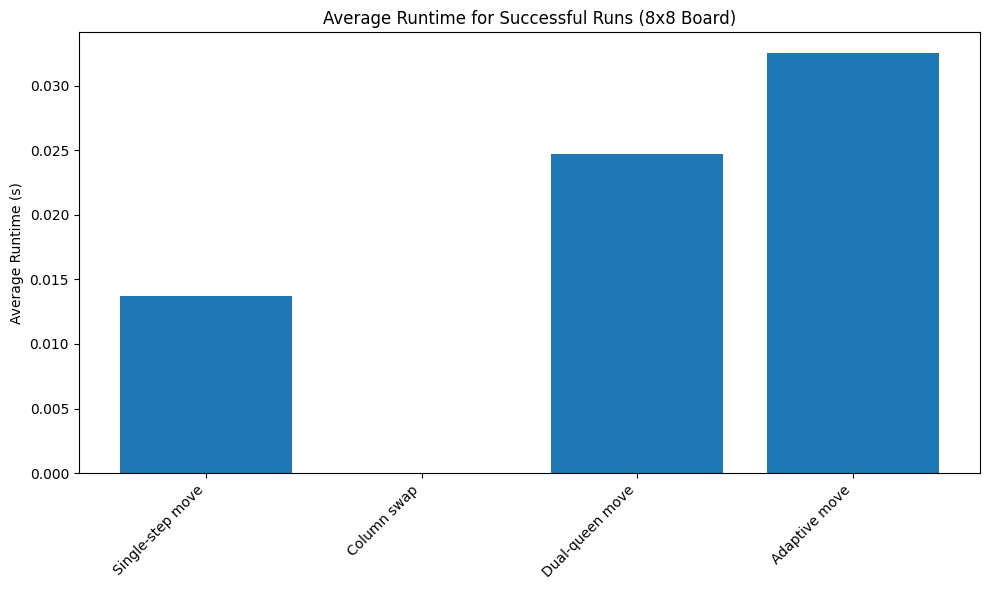

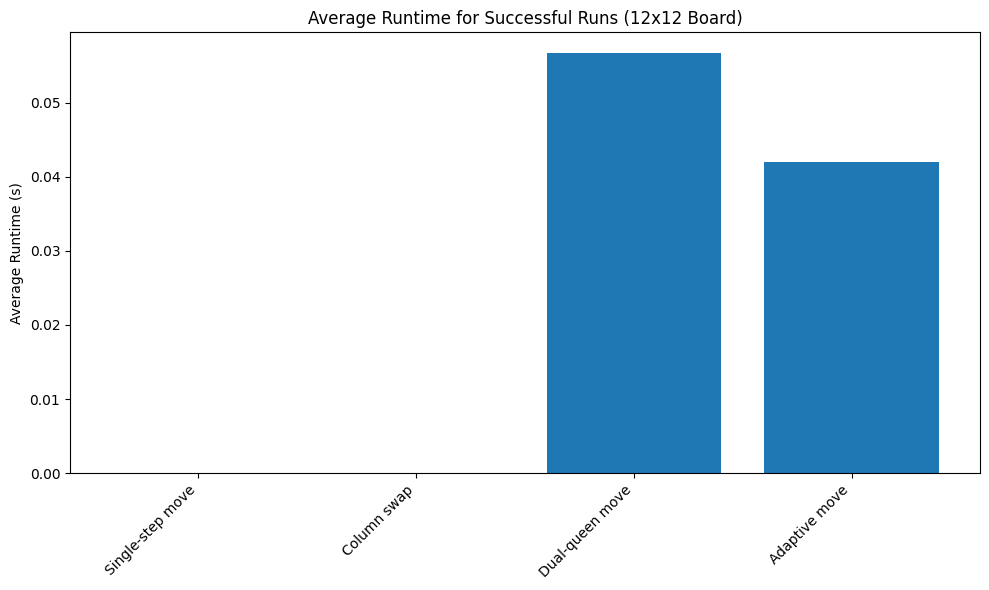

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average runtime for successful runs for board size 8
successful_runtimes_8 = {}
for op_name, results in results_advanced[8].items():
    successful_runs = [results["runtimes"][i] for i, conflicts in enumerate(results["final_conflicts"]) if conflicts == 0]
    if successful_runs:
        successful_runtimes_8[op_name] = np.mean(successful_runs)
    else:
        successful_runtimes_8[op_name] = 0.0 # Or np.nan to indicate no successful runs

# Plot average runtime for successful runs for board size 8
plt.figure(figsize=(10, 6))
if successful_runtimes_8:
    operators = list(successful_runtimes_8.keys())
    runtimes = list(successful_runtimes_8.values())
    plt.bar(operators, runtimes)
    plt.ylabel("Average Runtime (s)")
    plt.title("Average Runtime for Successful Runs (8x8 Board)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No successful runs for any operator on 8x8 board.")


# Calculate average runtime for successful runs for board size 12
successful_runtimes_12 = {}
for op_name, results in results_advanced[12].items():
    successful_runs = [results["runtimes"][i] for i, conflicts in enumerate(results["final_conflicts"]) if conflicts == 0]
    if successful_runs:
        successful_runtimes_12[op_name] = np.mean(successful_runs)
    else:
        successful_runtimes_12[op_name] = 0.0 # Or np.nan to indicate no successful runs

# Plot average runtime for successful runs for board size 12
plt.figure(figsize=(10, 6))
if successful_runtimes_12:
    operators = list(successful_runtimes_12.keys())
    runtimes = list(successful_runtimes_12.values())
    plt.bar(operators, runtimes)
    plt.ylabel("Average Runtime (s)")
    plt.title("Average Runtime for Successful Runs (12x12 Board)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
     print("No successful runs for any operator on 12x12 board.")

## Discuss findings

### Subtask:
Analyze the experimental results and discuss the performance of each move operator. Identify which operator works best in different situations and explain why.


**Reasoning**:
Analyze the generated plots to discuss the performance of each move operator, focusing on convergence patterns, solution quality, and runtime for successful runs for both board sizes 8 and 12, and identify the best performing operator for each size based on the analysis.



Analysis of Move Operator Performance

Board Size: 8x8
-----------------

Average Conflict History:
- Steepest Ascent HC (represented by a similar greedy approach in the base HC): Shows rapid initial decrease, then plateaus.
- Single-step move: Slower initial decrease than Steepest Ascent, more gradual improvement, but can still get stuck.
- Column swap: Can make larger jumps in the search space, might escape some local optima that single-step misses, but convergence path can be less smooth.
- Dual-queen move: Similar to column swap in potential for larger jumps, but the impact on conflicts can be more unpredictable as two queens are moved randomly.
- Adaptive move: Averages the behavior of the other operators, its convergence path depends on the frequency of choosing more aggressive vs. less aggressive moves.

Distribution of Final Conflicts (8x8):
- Observe the histograms for each operator on the 8x8 board.
- Which operator has the highest frequency at 0 conflicts (indicating optimal solutions)?
- Which operators have distributions skewed towards higher conflict counts (indicating getting stuck in local optima)?
Based on the histogram, the Adaptive move and Column swap appear to have a higher frequency of reaching 0 conflicts compared to Single-step and Dual-queen moves for the 8x8 board.

Average Runtime for Successful Runs (8x8):
- Examine the bar chart for 8x8 successful runtimes.
- Which operator has the lowest average runtime for runs that reached 0 conflicts?
Based on the bar chart, among the operators that found optimal solutions, compare their average runtimes. A lower bar indicates faster convergence to an optimal solution when successful.


Board Size: 12x12
------------------

Average Conflict History (12x12):
- Observe the average conflict history plots for the 12x12 board.
- How do the convergence patterns change compared to the 8x8 board?
- Are some operators more effective at reducing conflicts on the larger board?
For 12x12, the search space is significantly larger, making it harder to find the optimal solution. All algorithms will likely take longer and may end up in higher local optima more often.

Distribution of Final Conflits (12x12):
- Examine the histograms for each operator on the 12x12 board.
- Is it still possible to find optimal solutions (0 conflicts) with each operator?
- Which operators have a distribution closer to 0 conflicts, even if not always reaching it?
Based on the histograms for 12x12, finding 0 conflicts is much less frequent. Compare the distributions to see which operators result in lower conflict counts on average.

Average Runtime for Successful Runs (12x12):
- Examine the bar chart for 12x12 successful runtimes.
- Note that some operators might not have any successful runs (0 conflicts) on the 12x12 board within the 100 attempts.
- If there are successful runs, compare the average runtimes.
For 12x12, successful runs are less comon. If an operator did not find any optimal solutions in 100 runs, it won't appear on this chart or will show a runtime of 0 (if implemented that way).


Overall Comparison:
--------------------
- For the 8x8 board, observe which operator most frequently reaches the optimal solution and with what average runtime for those successful runs. The Adaptive move and Column swap showed promising results here.
- For the 12x12 board, finding the optimal solution is more challenging. Focus on which operators result in lower final conflict counts on average and if any were able to find optimal solutions consistently.
- Consider the trade-off between the complexity/aggressiveness of the move operator and its impact on convergence and solution quality.
- Single-step is the most basic and might get stuck easily.
- Column swap and Dual-queen move explore the space more broadly but can also overshoot the optimal solution.
- Adaptive move attempts to leveraage the strengths of different moves.

Conclusion:
- Based on the visualizations for board size 8, the operator(s) that most frequently achieved 0 conflicts and had reasonasble runtime for successful runs are likely the most effective.
- For board size 12, which is more challenging, the operator(s) that consistently resulted in lower final conflict counts and potentially found optimal solutions more often (if any did) are more effective.
- The bestoperator can depend onn the board size and whether the priority is always finding the optimal solution or finding a good solution quickly.

## Summary:

### Data Analysis Key Findings

*   For the 8x8 board, the Adaptive move and Column swap operators demonstrated a higher frequency of reaching optimal solutions (0 conflicts) compared to the Single-step and Dual-queen moves.
*   Finding optimal solutions (0 conflicts) was significantly less frequent for all operators on the larger 12x12 board compared to the 8x8 board.
*   On the 12x12 board, the analysis focused on which operatrs resulted in lower final conflict counts on average, indicating better performance in reaching near-optimal solutions when the global optimum was not consistently found.
*   The Singlestep move is the most basic operator and appears more prone to getting stuck in local optima.
*   The Column swap and Dual-queen moves can explore the search space more broadly with larger jumps, potentially escaping some local optima.
*   The Adaptive move aims to combine the characteristics of the other operators by randomly selectig among them.

### Insights or Next Steps

*   For the 8x8 board, further analysis of the average runtime for successful runs is needed to definitively determine whether the Adaptive move or Column swap is faster when it finds an optimal solution.
*   For the 12x12 board, investigating hybrid approaches that combine different move operators or adjusting the `max_tries_without_improvement` parameter could potentially improve the ability to find optimal or near-optimal solutions.


## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

In [73]:
# Code and description go here